In [1]:
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms.functional import to_tensor, normalize
from torchvision import transforms, models, datasets
from torchvision.datasets import Food101
from torchvision.models import ResNet50_Weights
import matplotlib.pyplot as plt
from IPython.display import clear_output
from PIL import Image


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
print(torch.cuda.get_device_name(0))

def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((512, 512)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert('RGB')
    image = transform(image)
    # Add batch dimension
    image = image.unsqueeze(0)
    return image

def classify_image(image_path, model, class_labels):
    # Preprocess the image
    image = preprocess_image(image_path)
    
    # Use GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    image = image.to(device)
    
    # Set the model to evaluation mode
    model.eval()
    
    # Pass the image through the model
    with torch.no_grad():
        output = model(image)
    
    # Calculate probabilities using softmax
    probabilities = F.softmax(output, dim=1)
    
    # Get the top 5 predicted classes
    top5_prob, top5_indices = torch.topk(probabilities, 5)
    
    # Print the probabilities for each class
    # for i in range(len(class_labels)):
    #     print(f'{class_labels[i]}: {probabilities[0][i].item()*100:.2f}%')
    
    return top5_prob, top5_indices

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
        resnet = nn.Sequential(*list(resnet.children())[:-1])
        for param in resnet.parameters():
            param.requires_grad = False


        self.model = nn.Sequential(
            resnet,
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.25),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 105)
        )

    def forward(self, x):
        return self.model(x)
    
train_dir = "C:/Users/Vlad Talpiga.VLR_PROJAMZ/OneDrive - Valrom Industrie SRL/Desktop/Facultate/IAVA/Proiect/Food Classifier Final/datasets/data_105/splits/train"
train_dataset = datasets.ImageFolder(train_dir)
class_labels = train_dataset.classes

cuda
NVIDIA GeForce RTX 4060 Laptop GPU


In [2]:
len(class_labels)

105

Top 5 predicted classes:
papanasi: 87.70%
caprese_salad: 4.85%
foie_gras: 1.77%
panna_cotta: 1.11%
cheesecake: 0.89%


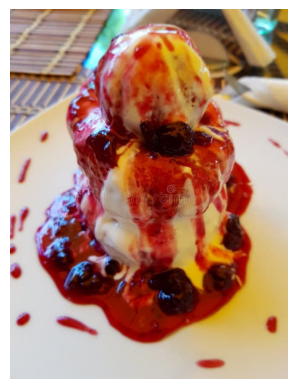

In [5]:
image_path = "test_images/2papanasi.jpg"

model = Model()
state_dict = torch.load('../saved_models/ReLU_epoch10.pkl')
model.load_state_dict(state_dict)

top5_probabilities, top5_indices = classify_image(image_path, model, class_labels)

print("Top 5 predicted classes:")
for i in range(5):
    print(f"{class_labels[top5_indices[0][i]]}: {top5_probabilities[0][i].item()*100:.2f}%")

image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()